# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг     компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#загрузить библиотеки
import pandas as pd 
from pymystem3 import Mystem 
m = Mystem()
from collections import Counter
import pylab as pl
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#прочитать данные и сохранить в df

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Итак, у нас есть данные о продажах игр с 1980 по 2016 год. Мы видим, что у нас есть некоторые отсутствующие значения. Проверим каждую колонку и подготовим данные для анализа.

## Шаг 2. Подготовьте данные

In [6]:
#изменить названия столбцов
df.columns = map(str.lower, df.columns)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#изменить игровые названия и жанры на строчные
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()

In [8]:
#изменить тип колонки
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df.duplicated().sum() 

0

In [11]:
#оценить отсутствующие значения name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#сбросить эти две строки
df = df.dropna(subset=['name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Мы опустили две строки и теперь давайте проанализируем недостающие значения в столбце года выпуска.

In [13]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,freaky flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,hakuouki: shinsengumi kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего у нас 269 отсутствующих значений в столбце. Давайте проверим, может быть, эти игры были выпущены на разных платформах, и мы сможем определить год.

In [14]:
#в качестве примера, давайте возьмем игру madden nfl 2004
df.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,madden nfl 2004,XB,2003,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,madden nfl 2004,GC,2003,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,madden nfl 2004,GBA,2003,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Наша гипотеза кажется верной. Давайте найдем названия игр, в которых отсутствует год выпуска, и сравним их с имеющимися данными. 

In [15]:
def find_similar_names(data,column_name):
    """
    Функция находит похожие имена для столбца name в строках с пропущенными значениями.
    """
    full_values = data.loc[~data[column_name].isnull()].groupby('name')[column_name].count().sort_values(ascending=False).to_dict()
    missing_values = data.loc[data[column_name].isnull()].groupby('name')[column_name].count().sort_values(ascending=False).to_dict()
    names = []
    for element in full_values:
        if element in missing_values:
            names.append(element)
    return names



In [16]:
names = find_similar_names(df,'year_of_release')

Создадим словарь с названием игры и годом выпуска.

In [17]:
names_dict = df.query('name in @names').groupby('name')['year_of_release'].max().to_dict()
names_dict
df['year_of_release'] = df['year_of_release'].fillna(df['name'].map(names_dict))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Таким образом, нам удалось заполнить недостающий год выпуска некоторых игр, и у нас все еще есть 146 игр без года выпуска. Давайте лучше их изучим.

In [18]:
display(df[df['year_of_release'].isna()])
df[df['year_of_release'].isna()].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,rock band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
804,rock band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,rock band,PS3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16275,homeworld remastered collection,PC,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16286,shorts,DS,NaN,platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16346,agarest senki: re-appearance,PS3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16456,hakuouki: shinsengumi kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,146.000000,146.000000,146.000000,146.000000,62.000000
mean,NaN,0.186986,0.057808,0.032740,0.021849,65.806452
std,NaN,0.344737,0.127617,0.096779,0.055124,15.547746
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,54.000000
50%,NaN,0.070000,0.010000,0.000000,0.005000,69.000000
75%,NaN,0.187500,0.060000,0.020000,0.010000,77.000000
max,NaN,2.150000,1.020000,0.630000,0.410000,92.000000


75 % игр имеют почти нулевой уровень продаж в Японии, 50 % - в Европе и 25 % - в Северной Америке. Похоже, что эти игры были более популярны в Северной Америке, и после проверки названия некоторых игр в интернете мы смогли обнаружить, что они были выпущены сначала в Северной Америке, а затем и в других регионах. У них также разные годы выпуска игр для разных регионов. Так что это менее 1% данных, я бы отбросил их от основных данных.

In [19]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null Int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         9934 non-null object
rating             9868 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


На самом деле, давайте проверим, есть ли у некоторых игр разные годы выпуска на разных платформах.

In [20]:
test = df.groupby('name')['year_of_release'].max() - df.groupby('name')['year_of_release'].min()

In [21]:
(test > 0).sum()

694

Есть 694 игры с разным годом выпуска в зависимости от платформы. Мы решили взять последний год, чтобы заполнить недостающие значения, и я думаю, что это не повлияет на данные. Так как недостающих значений было так мало для столбца year_of_release.

А теперь давайте разберемся со столбцами рейтинга. У нас там много недостающих значений. Также в столбце оценка пользователя у нас есть значение, которое называется tbd. Это означает, что игра не получила достаточно отзывов для рейтинга, и мы можем установить это значение как NaN. Заполнение недостающих значений будет таким же, как и для столбца year_of_release. Здесь мы также должны заметить, что рейтинг зависит от платформы для некоторых игр, но так как количество игр с разным рейтингом на разных платформах невелико, мы можем просто следовать той же стратегии, что и в случае со столбцом year_of_release.

In [22]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
519,zumba fitness 2,Wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
643,udraw studio,Wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
714,just dance kids,Wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16547,planet monsters,GBA,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16549,bust-a-move 3000,GC,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16550,mega brain boost,DS,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16556,plushees,DS,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [23]:
#изменение нецифрового типа на NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null Int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             9868 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [25]:
names = find_similar_names(df,'critic_score')

In [26]:
names_dict = df.query('name in @names').groupby('name')['critic_score'].max().to_dict()
df['critic_score'] = df['critic_score'].fillna(df['name'].map(names_dict))
df['critic_score'].isna().sum()

7532

In [27]:
names = find_similar_names(df,'user_score')

In [28]:
names_dict = df.query('name in @names').groupby('name')['user_score'].max().to_dict()
df['user_score'] = df['user_score'].fillna(df['name'].map(names_dict))

In [29]:
#заполнение столбца рейтинга
dict_rating = df[['name','rating']].set_index('name')['rating'].to_dict()
df['rating'] = df['rating'].fillna(df['name'].map(dict_rating))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null Int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       9035 non-null float64
user_score         8639 non-null float64
rating             10067 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,0.0,335.000000
mean,2005.420340,0.174226,0.079600,0.106543,0.020612,NaN,6.513134
std,7.070685,0.751158,0.325917,0.359141,0.086173,NaN,2.061438
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.300000
50%,2008.000000,0.010000,0.000000,0.010000,0.000000,NaN,7.000000
75%,2010.000000,0.120000,0.040000,0.070000,0.010000,NaN,8.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,9.700000


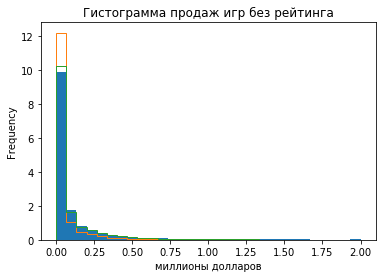

In [31]:
data_nan = df.loc[df['critic_score'].isna()]
(data_nan['na_sales'].hist(bins=30,density=True,range=(0,2))
)
(df['jp_sales'].plot(kind='hist',histtype='step',bins=30,density=True,range=(0,2))
)
(df['eu_sales'].plot(kind='hist',histtype='step',bins=30,density=True,range=(0,2))
)
plt.title('Гистограмма продаж игр без рейтинга')
plt.xlabel('миллионы долларов')
data_nan.describe()

In [32]:
#суммарные продажи во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

Итак, мы попытались заполнить недостающие данные, и самые большие недостающие части находятся в графах, связанных с рейтингами. В реальности мы могли бы найти эту информацию в интернете, но это выходит за рамки данного проекта. Из приведенного выше описания этих данных видно, что более 75% игр с отсутствующими рейтингами не заработали даже миллиона в продажах. Так как мы не можем заполнить их, основываясь на наших данных, мы бы оставили их так, как они есть, и считали бы, что они не будут влиять на наши исследования.

## Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0.5, 0, 'Год выпуска')

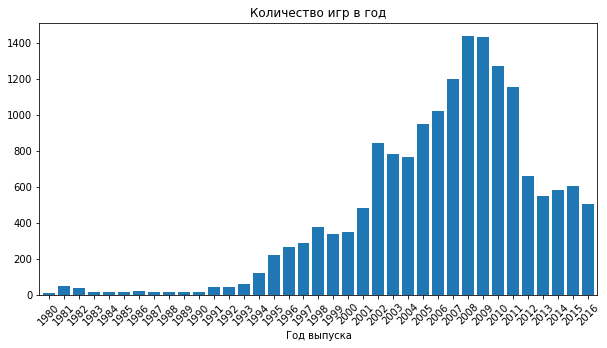

In [33]:

df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(10,5),width=.8,rot = 45)
plt.title('Количество игр в год')
plt.xlabel('Год выпуска')

Мы видим значительные изменения в производстве игр в 2002 году. Поэтому было бы более уместно рассмотреть период с 2002 по 2016 год.

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Продажи, миллионы')

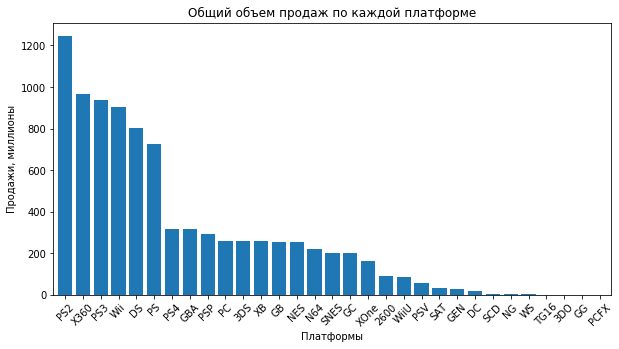

In [34]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),width=.8,rot = 45)
plt.title('Общий объем продаж по каждой платформе')
plt.xlabel('Платформы')
plt.ylabel('Продажи, миллионы')

Мы можем видеть самые популярные платформы, исходя из общего объема продаж за все годы. Посмотрим, какова средняя продолжительность жизни платформ на основе наиболее популярных. Если мы построим их все на одном графике, то это будет хаос.

Text(0, 0.5, 'Продажи, миллионы')

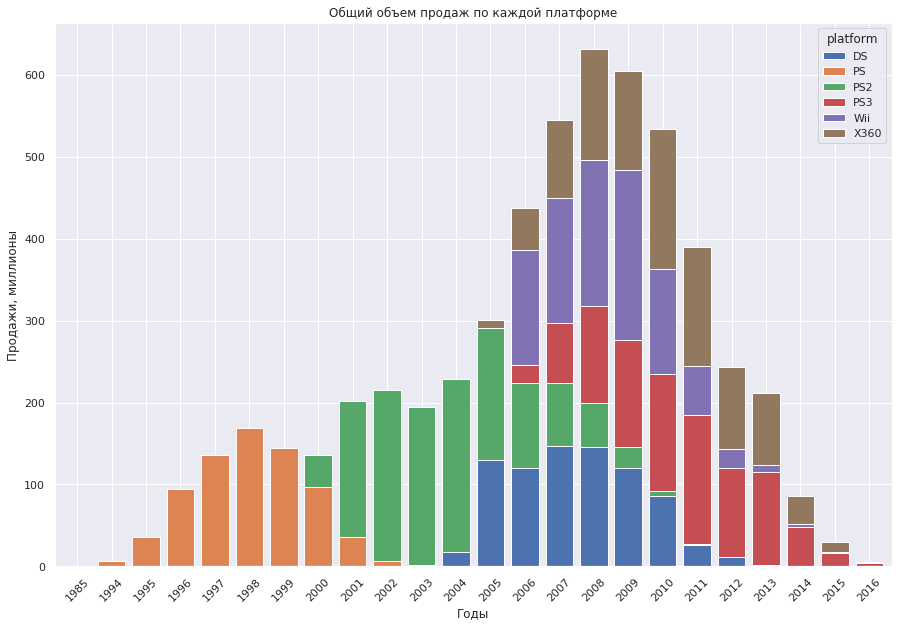

In [35]:
names = ['PS2','X360','PS3','Wii','DS','PS']
sns.set()
(df.query('platform in @names').pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')
 .plot(kind='bar',stacked = True, figsize=(15,10),width=.8,rot = 45)

)
plt.title('Общий объем продаж по каждой платформе')
plt.xlabel('Годы')
plt.ylabel('Продажи, миллионы')

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Видно, что в среднем каждая платформа живет около 10 лет.  Также, вероятно, данные о продажах касаются не денег, а количества проданных единиц. Пик продаж для каждой платформы в среднем составляет около 5 лет. Как период, который поможет нам спрогнозировать продажи на следующий год, я возьму 5 лет, поэтому мы должны начать с 2010 г, так как 2016 год не завершен. 

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [36]:
#давайте посмотрим платформы после 2010 года и выбираем те, которые произведены в 2010 году или позже.
dict_pf = df.query('year_of_release >= 2010').groupby('platform')['name'].count().reset_index()
dict_pf_names = dict_pf['platform']
df.query('platform in @dict_pf_names').groupby('platform')['year_of_release'].min().sort_values()

platform
DS      1985
PC      1985
PS2     2000
PSP     2004
PS3     2005
X360    2005
Wii     2006
3DS     2010
PSV     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: Int64

Text(0, 0.5, 'Продажи, миллионы')

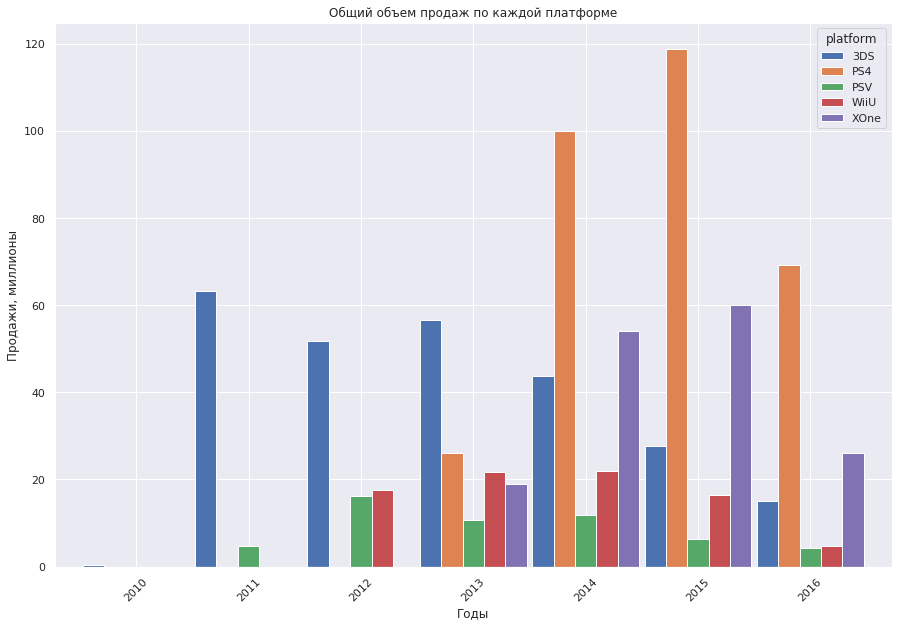

In [37]:
names = ['PS4','XOne','3DS','PSV','WiiU']
sns.set()
(df.query('year_of_release >= 2010 and platform in @names').pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')
 .plot(kind='bar',stacked = False, figsize=(15,10),width=.95,rot = 45)
)
plt.title('Общий объем продаж по каждой платформе')
plt.xlabel('Годы')
plt.ylabel('Продажи, миллионы')

Очевидно, что мы видим рост платформ XOne и PS4. Так как 2016 год, вероятно, не показывает всю картину за весь год, мы видим, что продажи, кажется, упали, но это, вероятно, не реалистично. Это имеет смысл, поскольку XOne и PS4 являются самыми современными платформами на рынке.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [38]:
names = ['PS4','XOne']
games_fav=df.query('platform in @names')
games_fav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 31 to 16524
Data columns (total 12 columns):
name               639 non-null object
platform           639 non-null object
year_of_release    639 non-null Int64
genre              639 non-null object
na_sales           639 non-null float64
eu_sales           639 non-null float64
jp_sales           639 non-null float64
other_sales        639 non-null float64
critic_score       487 non-null float64
user_score         496 non-null float64
rating             467 non-null object
total_sales        639 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 65.5+ KB


In [39]:
#давайте посмотрим данные по общим продажам для каждой платформы
games_fav.groupby('platform')['total_sales'].describe(percentiles = [.01,.25,.75,.99])

,count,mean,std,min,1%,25%,50%,75%,99%,max
platform,,,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.01,0.06,0.20,0.730,7.6888,14.63
XOne,247.0,0.645020,1.036139,0.01,0.01,0.06,0.22,0.685,4.9058,7.39


Мы видим, что игр для PS4 больше, чем для XOne. Медианное значение немного больше для XOne. Давайте позаботимся о том, чтобы избавиться от выбросов. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2)

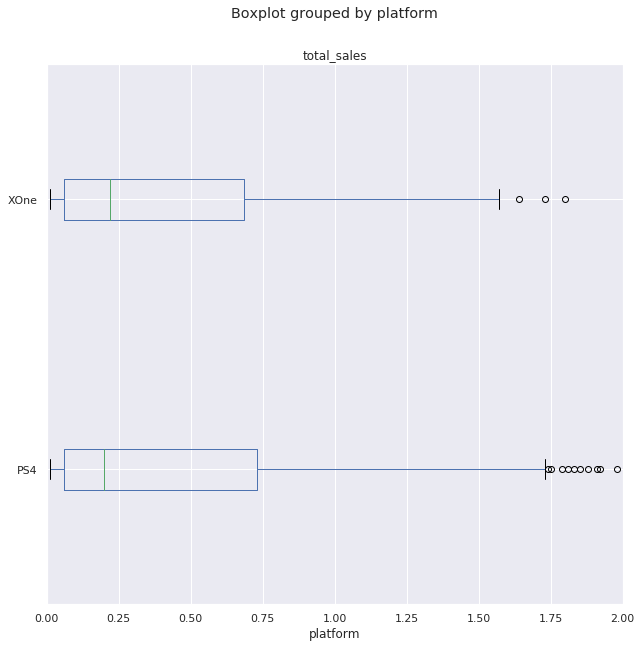

In [40]:
#давайте ограничим ось Х до 2 миллионов
games_fav.boxplot('total_sales',by='platform', vert=False, figsize=(10,10))
plt.xlim(0, 2)

Мы видим, что медианное значение для платформы XOne немного выше, но продажи для PS4 больше. 

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [41]:
ps4 = games_fav.query('platform == "PS4"').reset_index()
display(ps4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 13 columns):
index              392 non-null int64
name               392 non-null object
platform           392 non-null object
year_of_release    392 non-null Int64
genre              392 non-null object
na_sales           392 non-null float64
eu_sales           392 non-null float64
jp_sales           392 non-null float64
other_sales        392 non-null float64
critic_score       285 non-null float64
user_score         290 non-null float64
rating             270 non-null object
total_sales        392 non-null float64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 40.3+ KB


None

Соотношение между общим объемом продаж и рейтингом критиков: 0.3877578521578008
Соотношение между общим объемом продаж и рейтингом пользователей: -0.023137222858728282
Соотношение между рейтингом критика и рейтингом пользователя: 0.5699737969388269


Text(0.5, 0.98, 'Матрица рассеяния')

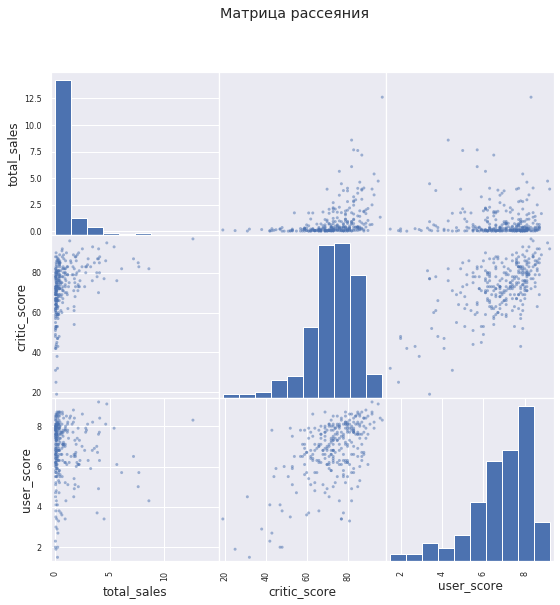

In [42]:
print('Соотношение между общим объемом продаж и рейтингом критиков:',ps4['total_sales'].corr(ps4['critic_score'])) 
print('Соотношение между общим объемом продаж и рейтингом пользователей:',ps4['total_sales'].corr(ps4['user_score']))
print('Соотношение между рейтингом критика и рейтингом пользователя:',ps4['critic_score'].corr(ps4['user_score']))

check_corr = ps4[['total_sales','critic_score','user_score']]
pd.plotting.scatter_matrix(check_corr, figsize=(9, 9))
pl.suptitle('Матрица рассеяния')

Интересно отметить сильную положительную корреляцию между общим объемом продаж и рейтингом критиков, небольшую отрицательную корреляцию с рейтингом пользователей (почти ноль). Существует также сильная зависимость между рейтингом пользователя и рейтингом критика.

- Соотнесите выводы с продажами игр на других платформах.

In [43]:
print('Соотношение между общим объемом продаж и рейтингом критиков:',df['total_sales'].corr(df['critic_score'])) 
print('Соотношение между общим объемом продаж и рейтингом пользователей:',df['total_sales'].corr(df['user_score']))
print('Соотношение между рейтингом критика и рейтингом пользователя:',df['critic_score'].corr(df['user_score']))


Соотношение между общим объемом продаж и рейтингом критиков: 0.23700126689013687
Соотношение между общим объемом продаж и рейтингом пользователей: 0.08775281486934128
Соотношение между рейтингом критика и рейтингом пользователя: 0.5308168212253901


Быстрый расчет корреляции для всего набора данных в основном показывает то же самое поведение.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Продажи, миллионы')

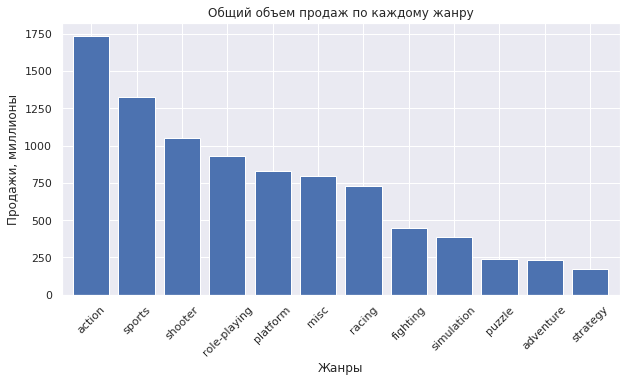

In [44]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),width=.8,rot = 45)
plt.title('Общий объем продаж по каждому жанру')
plt.xlabel('Жанры')
plt.ylabel('Продажи, миллионы')

Больше всего продаж приходится на action, меньше всего - на strategy.

### Вывод

Итак, мы закончили анализ наших данных. Можно сказать, что с 2002 года мы наблюдаем огромный рост количества выпущенных игр. Мы нашли самые популярные платформы и проверили их продажи в течение многих лет. Мы видим, что в среднем одна платформа имеет 10-летний цикл. Пик продаж приходится на 5 лет. В течение 5 лет мы можем спрогнозировать продажи на следующий год, и мы нашли две платформы, где мы видим рост продаж: PS4 и XOne. Это имеет смысл, так как эти платформы являются самыми современными. Мы видим сильную корреляцию между рейтингом критика и общими продажами, не столь сильную корреляцию между рейтингом пользователя. В то же время это является сильной корреляцией между критиками и пользователями. Мы также видим, что большинство продаж сделали жанр action и меньше продаж - strategy.

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
a = (df.groupby(['platform'])[['na_sales']].sum().sort_values(by='na_sales',ascending=False).head(5).reset_index())
b = (df.groupby('platform')[['eu_sales']].sum().sort_values(by='eu_sales',ascending=False).head(5).reset_index())
c = (df.groupby('platform')[['jp_sales']].sum().sort_values(by='jp_sales',ascending=False).head(5).reset_index())
df_index = pd.merge(a, b, right_index=True, left_index=True)
df_index = pd.merge(df_index, c, right_index=True, left_index=True)
df_index

,platform_x,na_sales,platform_y,eu_sales,platform,jp_sales
0,X360,599.15,PS2,337.05,DS,175.02
1,PS2,580.09,PS3,328.97,PS,139.78
2,Wii,494.01,X360,269.79,PS2,137.74
3,PS3,391.60,Wii,261.48,SNES,116.55
4,DS,381.38,PS,212.39,3DS,100.64


Видно, что японский рынок поддерживает японские производители и, в основном, японские платформы в топ-5. Северная Америка - самый большой рынок, она продает больше, чем Европа и Япония. Также NA рынок Microsoft X360 платформа более популярна, чем в Европе и Японии.

In [46]:
a = (df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index())
b = (df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index())
c = (df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index())
df_index = pd.merge(a, b, right_index=True, left_index=True)
df_index = pd.merge(df_index, c, right_index=True, left_index=True)
df_index

,genre_x,na_sales,genre_y,eu_sales,genre,jp_sales
0,action,873.70,action,517.58,role-playing,353.88
1,sports,681.69,sports,375.60,action,160.15
2,shooter,590.35,shooter,316.96,sports,135.27
3,platform,444.44,racing,235.47,platform,130.71
4,misc,401.69,misc,211.32,misc,108.04


Если сравнить рынок NA и EU, то им нравятся почти схожие жанры. Но на японском рынке role-playing - самый популярный жанр. Если создатель игр хочет добиться успеха на японском рынке, то role-playing будет лучшим жанром.

In [47]:
a = (df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index())
b = (df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index())
c = (df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index())
df_index = pd.merge(a, b, right_index=True, left_index=True)
df_index = pd.merge(df_index, c, right_index=True, left_index=True)
df_index

,rating_x,na_sales,rating_y,eu_sales,rating,jp_sales
0,E,1321.93,E,725.11,E,206.40
1,T,768.44,M,494.22,T,157.31
2,M,759.06,T,436.16,M,66.36
3,E10+,363.53,E10+,194.47,E10+,47.63
4,K-A,2.56,AO,0.61,K-A,1.46


Самым популярным рейтингом является E, затем T и M. Таким образом, мы можем видеть, что продажи по рейтингу более менее одинаковы в каждом регионе. 

## Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Наша нулевая гипотеза о том, что средние значения равны, и альтернативная гипотеза - они не равны. Мы должны использовать t-тест, чтобы проверить и увидеть, если р-value больше или меньше, чем alpha(0,05). Если р-значение больше альфы, то мы допускаем нулевую гипотезу. Можно использовать t-test на наших данных, так как объем данных достаточно велик, даже если данные не имеют нормального распределения.

In [48]:
names = ['XOne','PC']
games_fav=df.query('platform in @names')
games_fav = games_fav.dropna(subset=['user_score']).reset_index(drop=True)
H = games_fav.groupby('platform')['user_score']
H.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,788.0,7.075254,1.522857,1.4,6.200,7.5,8.2,9.3
XOne,206.0,6.638835,1.387627,1.6,5.825,6.9,7.7,9.2


In [49]:
alpha = 0.05
results = st.ttest_ind(H.get_group('PC').values,
            H.get_group('XOne').values,
            equal_var = True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0002037558947632459
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу. Мы можем принять альтернативную гипотезу, где средний рейтинг пользователя не совпадает для платформ XOne и PC.

Давайте сделаем то же самое для жанров. Нулевая гипотеза - это средний рейтинг пользователя, равный для жанра Action и Sports. Альтернатива - не равна.

In [50]:
names = ['action','sports']
games_fav=df.query('genre in @names')
games_fav = games_fav.dropna(subset=['user_score']).reset_index(drop=True)
H = games_fav.groupby('genre')['user_score']
H.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,2102.0,7.080352,1.414896,0.3,6.400,7.4,8.100,9.5
sports,1320.0,6.994924,1.600051,0.2,6.175,7.4,8.125,9.5


In [51]:
alpha = 0.05
results = st.ttest_ind(H.get_group('action').values,
            H.get_group('sports').values,
            equal_var = True)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10242558286944554
Не получилось отвергнуть нулевую гипотезу


Здесь мы не можем отвергнуть нулевую гипотезу, средние рейтинги пользователей равны для жанра Action и Sports.

## Шаг 6. Общий вывод

Так что, проанализировав наши данные, мы можем прийти к следующему выводу. Наиболее популярными платформами на следующий год являются PS4 и XOne. Это продажи, которые должны расти. Самым популярным игровым жанром был бы экшен и спорт, а хорошая смесь рейтингов E, T и M сделала бы продажи максимально эффективными.  Мы должны полагаться на мнения экспертов, и игровая индустрия не исключение. Мы видим, что мнения экспертов коррелируют с продажами и можем предсказать самые продаваемые игры в следующем году. Похоже, что у нас также больше продаж для платформы PS4, но, возможно, это связано с тем, что платформа XOne не выпустила столько игр, сколько PS4. 